<a href="https://colab.research.google.com/github/Ihsanalmasry/MachingLearning_Labs_IHSAN-ALMASRY/blob/main/MLF_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Base Model ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 100.00%
Data sample [0. 0.], prediction 0.0342, ground truth 0.0
Data sample [0. 1.], prediction 0.9713, ground truth 1.0
Data sample [1. 0.], prediction 0.9715, ground truth 1.0
Data sample [1. 1.], prediction 0.0327, ground truth 0.0


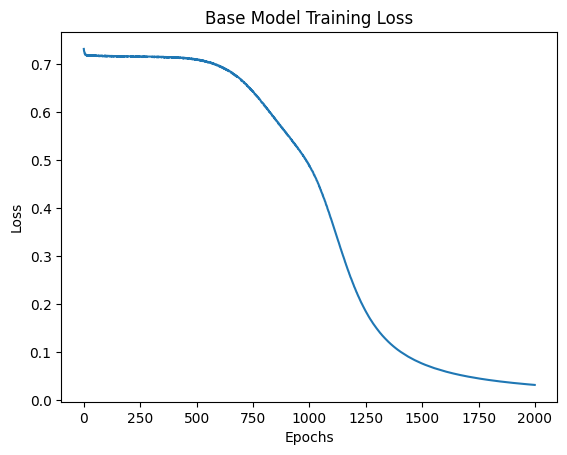


=== Experiment: Number of Epochs ===
Epochs: 100, Accuracy: 50.00%
Epochs: 500, Accuracy: 50.00%
Epochs: 1000, Accuracy: 75.00%
Epochs: 2000, Accuracy: 100.00%
Epochs: 5000, Accuracy: 100.00%

=== Experiment: Learning Rates ===
Learning Rate: 0.001, Accuracy: 50.00%
Learning Rate: 0.01, Accuracy: 75.00%
Learning Rate: 0.1, Accuracy: 100.00%
Learning Rate: 0.5, Accuracy: 75.00%
Learning Rate: 1.0, Accuracy: 75.00%

=== Experiment: Activation Functions ===
Hidden Activation: sigmoid, Accuracy: 100.00%
Hidden Activation: tanh, Accuracy: 100.00%
Hidden Activation: relu, Accuracy: 75.00%

=== Experiment: Batch Sizes ===
Batch Size: 1, Accuracy: 100.00%
Batch Size: 2, Accuracy: 100.00%
Batch Size: 4, Accuracy: 75.00%

=== Experiment: Number of Neurons ===
Hidden Neurons: 1, Accuracy: 75.00%
Hidden Neurons: 2, Accuracy: 100.00%
Hidden Neurons: 4, Accuracy: 100.00%
Hidden Neurons: 8, Accuracy: 100.00%
Hidden Neurons: 16, Accuracy: 100.00%

=== Experiment: Optimizers ===
Optimizer: SGD, Accura

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([0, 1, 1, 0], dtype=np.float32)

# Base Model
def run_base_model():
    print("\n=== Base Model ===")
    model = Sequential()
    model.add(Dense(2, activation='sigmoid', input_shape=(2,)))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

    loss, accuracy = model.evaluate(X, y, verbose=0)
    print('Accuracy: {:.2f}%'.format(accuracy*100))

    for id_x, data_sample in enumerate(X):
        # Reshape the input to have batch dimension
        prediction = model.predict(np.array([data_sample]), verbose=0)
        print(f"Data sample {data_sample}, prediction {prediction[0][0]:.4f}, ground truth {y[id_x]}")

    plt.figure()
    plt.plot(history.history['loss'])
    plt.title('Base Model Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

# Experiment with number of epochs
def experiment_epochs():
    print("\n=== Experiment: Number of Epochs ===")
    epochs_list = [100, 500, 1000, 2000, 5000]

    for epochs in epochs_list:
        model = Sequential()
        model.add(Dense(2, activation='sigmoid', input_shape=(2,)))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X, y, epochs=epochs, batch_size=1, verbose=0)

        loss, accuracy = model.evaluate(X, y, verbose=0)
        print(f'Epochs: {epochs}, Accuracy: {accuracy*100:.2f}%')

# Experiment with learning rates
def experiment_learning_rates():
    print("\n=== Experiment: Learning Rates ===")
    learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]

    for lr in learning_rates:
        model = Sequential()
        model.add(Dense(2, activation='sigmoid', input_shape=(2,)))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = tf.keras.optimizers.SGD(learning_rate=lr)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

        loss, accuracy = model.evaluate(X, y, verbose=0)
        print(f'Learning Rate: {lr}, Accuracy: {accuracy*100:.2f}%')

# Experiment with activation functions
def experiment_activations():
    print("\n=== Experiment: Activation Functions ===")
    activations = ['sigmoid', 'tanh', 'relu']

    for activation in activations:
        model = Sequential()
        model.add(Dense(2, activation=activation, input_shape=(2,)))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

        loss, accuracy = model.evaluate(X, y, verbose=0)
        print(f'Hidden Activation: {activation}, Accuracy: {accuracy*100:.2f}%')

# Experiment with batch sizes
def experiment_batch_sizes():
    print("\n=== Experiment: Batch Sizes ===")
    batch_sizes = [1, 2, 4]

    for batch_size in batch_sizes:
        model = Sequential()
        model.add(Dense(2, activation='sigmoid', input_shape=(2,)))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X, y, epochs=2000, batch_size=batch_size, verbose=0)

        loss, accuracy = model.evaluate(X, y, verbose=0)
        print(f'Batch Size: {batch_size}, Accuracy: {accuracy*100:.2f}%')

# Experiment with number of neurons
def experiment_neurons():
    print("\n=== Experiment: Number of Neurons ===")
    neurons_list = [1, 2, 4, 8, 16]

    for neurons in neurons_list:
        model = Sequential()
        model.add(Dense(neurons, activation='sigmoid', input_shape=(2,)))
        model.add(Dense(1, activation='sigmoid'))

        optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

        loss, accuracy = model.evaluate(X, y, verbose=0)
        print(f'Hidden Neurons: {neurons}, Accuracy: {accuracy*100:.2f}%')

# Experiment with optimizers
def experiment_optimizers():
    print("\n=== Experiment: Optimizers ===")
    optimizers = {
        'SGD': tf.keras.optimizers.SGD(learning_rate=0.1),
        'Adam': tf.keras.optimizers.Adam(learning_rate=0.01),
        'RMSprop': tf.keras.optimizers.RMSprop(learning_rate=0.01)
    }

    for name, optimizer in optimizers.items():
        model = Sequential()
        model.add(Dense(2, activation='sigmoid', input_shape=(2,)))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

        history = model.fit(X, y, epochs=1000, batch_size=1, verbose=0)

        loss, accuracy = model.evaluate(X, y, verbose=0)
        print(f'Optimizer: {name}, Accuracy: {accuracy*100:.2f}%')

# Run all experiments
def main():
    run_base_model()
    experiment_epochs()
    experiment_learning_rates()
    experiment_activations()
    experiment_batch_sizes()
    experiment_neurons()
    experiment_optimizers()

if __name__ == "__main__":
    main()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

=== Data Examination ===
1. This is a classification task (predicting political party)
2. Number of samples: 435
3. Number of features: 16
4. Data types:
Unnamed: 0                                 int64
Class Name                                object
handicapped-infants                       object
water-project-cost-sharing                object
adoption-of-the-budget-resolution         object
physician-fee-freeze                      object
el-salvador-aid                           object
religious-groups-in-schools               object
anti-satellite-test-ban                   object
aid-to-nicaraguan-contras                 object
mx-missile                                object
immigration                               object
synfuels-corporation-cutback              object
education-spending                        object
superfund-right-to-sue        

<ipython-input-15-7d838ebeac0d>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_processed = X.replace({'y': 1, 'n': 0, '?': -1})
<ipython-input-15-7d838ebeac0d>:43: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_processed = X.replace({'y': 1, 'n': 0, '?': -1})
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super()._

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 417 (1.63 KB)

 Trainable params: 417 (1.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6036 - loss: 0.6657 - val_accuracy: 0.5429 - val_loss: 0.6359
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6188 - loss: 0.5725 - val_accuracy: 0.5429 - val_loss: 0.5662
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6106 - loss: 0.4919 - val_accuracy: 0.5571 - val_loss: 0.5205
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6510 - loss: 0.4291 - val_accuracy: 0.6286 - val_loss: 0.4928
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7063 - loss: 0.4246 - val_accuracy: 0.6429 - val_loss: 0.4763
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7819 - loss: 0.3825 - val_accuracy: 0.7143 - val_loss: 0.4628
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8034 - loss: 0.3655 - val_accuracy: 0.7714 - val_loss: 0.4529
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8366 - loss: 0.3633 - val_accuracy: 0.8429 - val

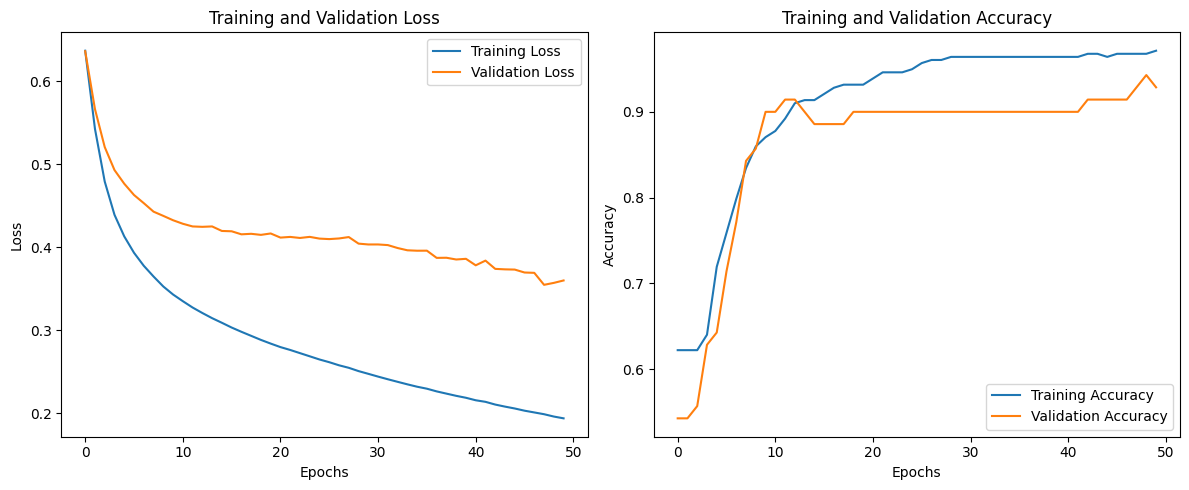

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Sample Predictions:
Sample 1:
  Features: ['n' 'n' 'y' 'n' 'n' 'n' 'y' 'y' 'y' 'y' 'n' 'n' 'n' 'y' 'n' 'y']
  Actual: democrat
  Predicted: democrat
  Confidence: 0.03

Sample 2:
  Features: ['y' 'y' 'y' 'n' 'y' 'y' 'n' 'n' 'n' 'y' 'y' 'n' 'y' 'y' 'n' 'y']
  Actual: democrat
  Predicted: democrat
  Confidence: 0.00

Sample 3:
  Features: ['n' '?' 'n' 'y' 'y' 'y' 'n' 'n' 'n' 'y' 'n' 'y' 'y' 'y' 'n' 'n']
  Actual: republican
  Predicted: republican
  Confidence: 0.67

Sample 4:
  Features: ['n' 'y' 'n' 'y' 'y' 'y' 'n' 'n' 'n' 'n' 'n' 'y' 'y' 'y' 'n' 'y']
  Actual: republican
  Predicted: republican
  Confidence: 0.67

Sample 5:
  Features: ['n' 'y' 'n' 'y' 'y' 'y' 'n' 'n' 'n' 'n' 'y' 'y' 'y' 'y' 'n' 'n']
  Actual: republican
  Predicted: republican
  Confidence: 0.67



In [15]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# 1. Loading dataset
from google.colab import drive
drive.mount('/content/drive')
path_to_dataset = '/content/drive/MyDrive/Colab Notebooks/voting_complete.csv'  # Update with your path
pd_dataset = pd.read_csv(path_to_dataset)

# 2. Train/Test Split (improved version)
def custom_train_test_split(pd_data, test_ratio=0.2):
    # Separate features and target
    X = pd_data.iloc[:, 2:].copy()  # Skip first two columns (index and Class Name)
    y = pd_data.iloc[:, 1].copy()   # Class Name column contains the party info

    # Perform the split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=42)

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = custom_train_test_split(pd_dataset)

# 3. Data examination
print("\n=== Data Examination ===")
print("1. This is a classification task (predicting political party)")
print(f"2. Number of samples: {len(pd_dataset)}")
print(f"3. Number of features: {len(pd_dataset.columns) - 2}")  # minus index and target columns
print("4. Data types:")
print(pd_dataset.dtypes)
print("5. Missing values per column:")
print(pd_dataset.isna().sum())
print(f"6. Number of labels: {len(pd_dataset['Class Name'].unique())} (Democrat, Republican)")

# 4. Data preprocessing
def preprocess_data(X, y, fit_encoder=True):
    # Handle missing values (consider them as 'unknown')
    X_processed = X.replace({'y': 1, 'n': 0, '?': -1})

    # Encode labels (Democrat: 0, Republican: 1)
    if fit_encoder:
        global label_encoder
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
    else:
        y_encoded = label_encoder.transform(y)

    return X_processed.values, y_encoded

# Preprocess train and test data
X_train_processed, y_train_encoded = preprocess_data(X_train, y_train, fit_encoder=True)
X_test_processed, y_test_encoded = preprocess_data(X_test, y_test, fit_encoder=False)

# 5. Creating the model
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_processed.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

print("\n=== Model Summary ===")
model.summary()

# 6. Compile and train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_processed, y_train_encoded,
                   epochs=50,
                   batch_size=16,
                   validation_split=0.2,
                   verbose=1)

# 7. Model Evaluation
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_processed, y_test_encoded, verbose=0)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Make predictions on test set
predictions = model.predict(X_test_processed)
predicted_classes = (predictions > 0.5).astype(int)

# Show some predictions vs actual
print("\nSample Predictions:")
for i in range(5):
    print(f"Sample {i+1}:")
    print(f"  Features: {X_test.iloc[i].values}")
    print(f"  Actual: {label_encoder.inverse_transform([y_test_encoded[i]])[0]}")
    print(f"  Predicted: {label_encoder.inverse_transform(predicted_classes[i])[0]}")
    print(f"  Confidence: {predictions[i][0]:.2f}")
    print()